* ## Starting with regular Imports
* ## Understanding the Data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


presence of heart disease:1
NO presence of heart disease:0


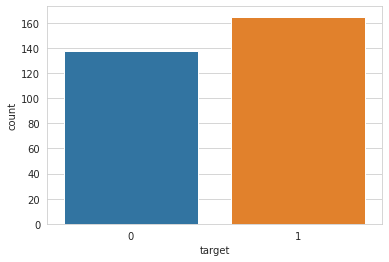

In [4]:
sns.countplot('target', data=df)
print('presence of heart disease:1')
print('NO presence of heart disease:0')

## Info. about Attributes

1. **age**:  *The person's age in years*

2. **sex**:  *The person's sex (1 = male, 0 = female)*

3. **cp**:  *The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)*

4. **trestbps**:  *The person's resting blood pressure (mm Hg on admission to the hospital*)

5. **chol**:  *The person's cholesterol measurement in mg/dl*

6. **fbs**:  *The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)*

7. **restecg**:  *Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)*

8. **thalach**:  *The person's maximum heart rate achieved*

9. **exang**:  *Exercise induced angina (1 = yes; 0 = no)*

10. **oldpeak**:  *ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)*

11. **slope**:  *The slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)*

12. **ca**:  *The number of major vessels (0-3)*

13. **thal**:  *A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)*

14. **target**:  *Heart disease (0 = no, 1 = yes)*

 ## EDA + Data Preprocessing

In [5]:
import pandas_profiling as pp
pp.ProfileReport(df)

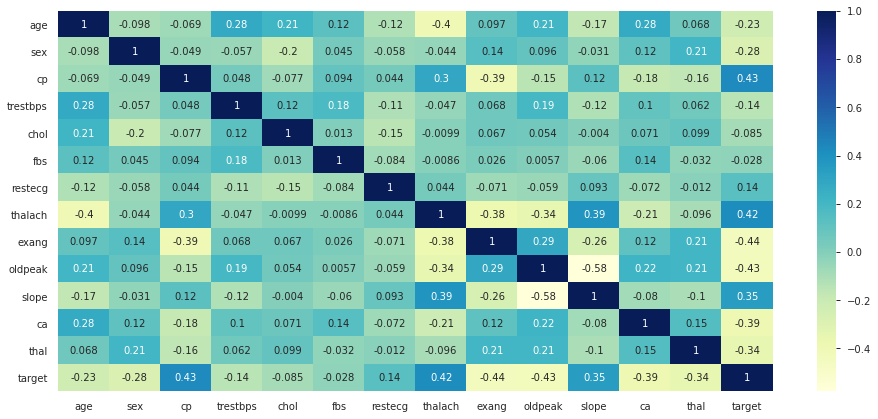

In [6]:
corr=df.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

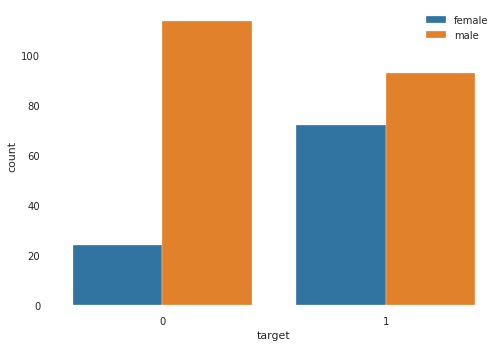

In [7]:
ax=sns.countplot('target', hue='sex', data=df)
labels=['female','male']
ax.legend(labels)

> ### NOTE: pd.get_dummies assumes the data passed in it to be string/object ones. <br>
> ### If you pass simply data consisting of simply 0,1,1,0,1(dtype=number) it returns same value

In [ ]:
dummes=pd.get_dummies(df[['sex','cp','fbs','restecg','slope']].astype(str), drop_first=True)
dummes[0:5]

In [ ]:
# Droping Thal categoy due to unproper info.
df=df.drop(['sex','cp','fbs','restecg','exang','ca','thal'], axis=1)

In [ ]:
data=pd.concat([df, dummes], axis=1)
data.head()

## When Should You Use Normalization And Standardization:
1. **Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

2. **Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

## Fitting to ML models without *Normalization*

In [ ]:
# imports we need............
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV

In [ ]:
def find_best_model(x,y):
    params={
        'lin_reg':{
            'model': LinearRegression(),
            'para' :{
                'normalize':[True,False]
            }
        },
        'rand_reg':{
            'model': RandomForestRegressor(),
            'para':{
                'n_estimators':[5,8,9,15],
                'max_depth':[1,2,3,4]
            }
        }
        
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2)
    for nam,config in params.items():
        gs=GridSearchCV(config['model'],config['para'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model':nam,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        print(gs.best_score_)
    
    
    return pd.DataFrame(score)

In [ ]:
data_x,data_y= data.drop(['target','thal','ca'],axis=1), data.target
def fit(model, cv):
    return cross_val_score(model,data_x, data_y, cv=cv).mean()

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)
acc=[]
for i in tqdm(range(1,76)):
    log_clf=KNeighborsClassifier(n_neighbors=i)
    acc.append(fit(log_clf,cv))
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc ,marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.18)
acc=[]
for i in tqdm(range(1,60)):
    log_clf=SVC(C=i)
    acc.append(fit(log_clf,cv))

plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.18)
acc=[]
dict_={}
for i in tqdm(range(1,152)):
    log_clf=RandomForestClassifier(n_estimators=i)
    Accuracy=fit(log_clf,cv)
    acc.append(Accuracy)
    dict_[i]=Accuracy

plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

## Fitting to ML models with *Normalization*

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_x=min_max_scaler.fit_transform(data_x)

def fit(model, cv):
    return cross_val_score(model,data_x, data_y, cv=cv).mean()

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.18)
acc=[]
for i in range(1,31):
    log_clf=LogisticRegression(C=i)
    acc.append(fit(log_clf,cv))
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)
acc=[]
for i in tqdm(range(1,76)):
    log_clf=KNeighborsClassifier(n_neighbors=i)
    acc.append(fit(log_clf,cv))
plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.18)
acc=[]
for i in tqdm(range(1,60)):
    log_clf=SVC(C=i)
    acc.append(fit(log_clf,cv))

plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.18)
acc=[]
dict_={}
for i in tqdm(range(1,152)):
    log_clf=RandomForestClassifier(n_estimators=i)
    Accuracy=fit(log_clf,cv)
    acc.append(Accuracy)
    dict_[i]=Accuracy

plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
data_x.shape

In [ ]:
#set acco.
data.drop(['target','thal','ca'],axis=1).head(5)

In [ ]:
data_x[:5]

In [ ]:
data_y[:5]

In [ ]:
X,x,Y,y=train_test_split(data_x,data_y,test_size=0.15, random_state=8)

In [ ]:
X.shape,x.shape,x.shape[0]-y.sum(),y.sum(),X.shape[0]-Y.sum(),Y.sum()

In [ ]:
acc=[]
for i in tqdm(range(1,155)):
    rand_clf=RandomForestClassifier(n_estimators=i, random_state=123)
    rand_clf.fit(X,Y)
    acc.append(rand_clf.score(x,y))
plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(acc ,marker='o')

In [ ]:
acc.index(max(acc))

In [ ]:
acc

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
rand_clf=RandomForestClassifier(n_estimators=9,random_state=123)
rand_clf.fit(X,Y)

In [ ]:
rand_clf.score(x,y)

In [ ]:
print(classification_report(y,rand_clf.predict(x)))

In [ ]:
rand_clf.predict_proba(x)

In [ ]:
rand_clf.predict(x)

In [ ]:
np.array(y)

In [ ]:
import pickle
%cd /kaggle/working/

In [ ]:
with open('Heart_model_final.pkl','wb') as f:
    pickle.dump(rand_clf,f)